In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [5]:
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rc('font', family='Hancom Gothic Regular') 
print(plt.rcParams['font.family'])
%matplotlib inline

['Hancom Gothic Regular']


In [ ]:
plt.rcParams['axes.unicode_minus'] = False
mpl.matplotlib_fname()

In [66]:
df=pd.read_csv('data/jeju_data_ver1/201901-202003.csv')

In [71]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
df['REG_YYMM']=df['REG_YYMM'].apply(lambda x:str(x))
df['REG_YYMM']=df['REG_YYMM'].apply(lambda x:x[:4]+'/'+x[4:])

In [ ]:
df['REG_YYMM']=pd.to_datetime(df['REG_YYMM'])

In [ ]:
dfdate=df.set_index('REG_YYMM')
dfdate.head()

In [ ]:
dfdate.resample('M').sum()['AMT'].plot()

In [ ]:
df1=df.set_index(['REG_YYMM','STD_CLSS_NM'])
df1.groupby(level=0)['AMT'].agg({'sum': np.sum})

In [ ]:
df1.groupby(['REG_YYMM','STD_CLSS_NM'])['AMT'].agg({'sum': np.sum})

In [ ]:
df.groupby('REG_YYMM')['AMT'].agg({'업종별_총금액':np.sum})

In [ ]:
df.loc[df['HOM_SIDO_NM']==df['CARD_SIDO_NM'],'고정사용여부']=1
df.loc[df['HOM_SIDO_NM']!=df['CARD_SIDO_NM'],'고정사용여부']=0

In [ ]:
df['고정사용여부'].value_counts()

In [ ]:
df

In [ ]:
df['CARD_SIDO_NM'].value_counts().sort_values(ascending=False)

In [4]:
df = pd.read_csv("data/jeju_data_ver1/201901-202003.csv", date_parser=lambda x:datetime.strptime(str(x), "%Y-%m"))
df['REG_YYMM_str'] = df['REG_YYMM'].apply(lambda x:str(x)) # 나중에 그래프 그릴 때 이용하기 위해서

SIDOS = df['CARD_SIDO_NM'].unique()
CLASS_NAMES = df['STD_CLSS_NM'].unique()

def graph_sido_amt(sido):
    print(sido)
    fig, axes = plt.subplots(nrows=len(CLASS_NAMES)//2 + 1, ncols=2, figsize=(16, 100))
    sido_table = df.loc[df['CARD_SIDO_NM']==sido, :]
    for i, NAME in enumerate(CLASS_NAMES):
        temp = sido_table.loc[df['STD_CLSS_NM']==NAME, :].groupby('REG_YYMM_str')[['AMT']].sum()
        try:
            temp.plot(title=sido+"_"+NAME, ylim=[0, temp['AMT'].max()*1.2], ax=axes[i//2][i%2])
        except:
            print(NAME)

서울
휴양콘도 운영업
그외 기타 분류안된 오락관련 서비스업


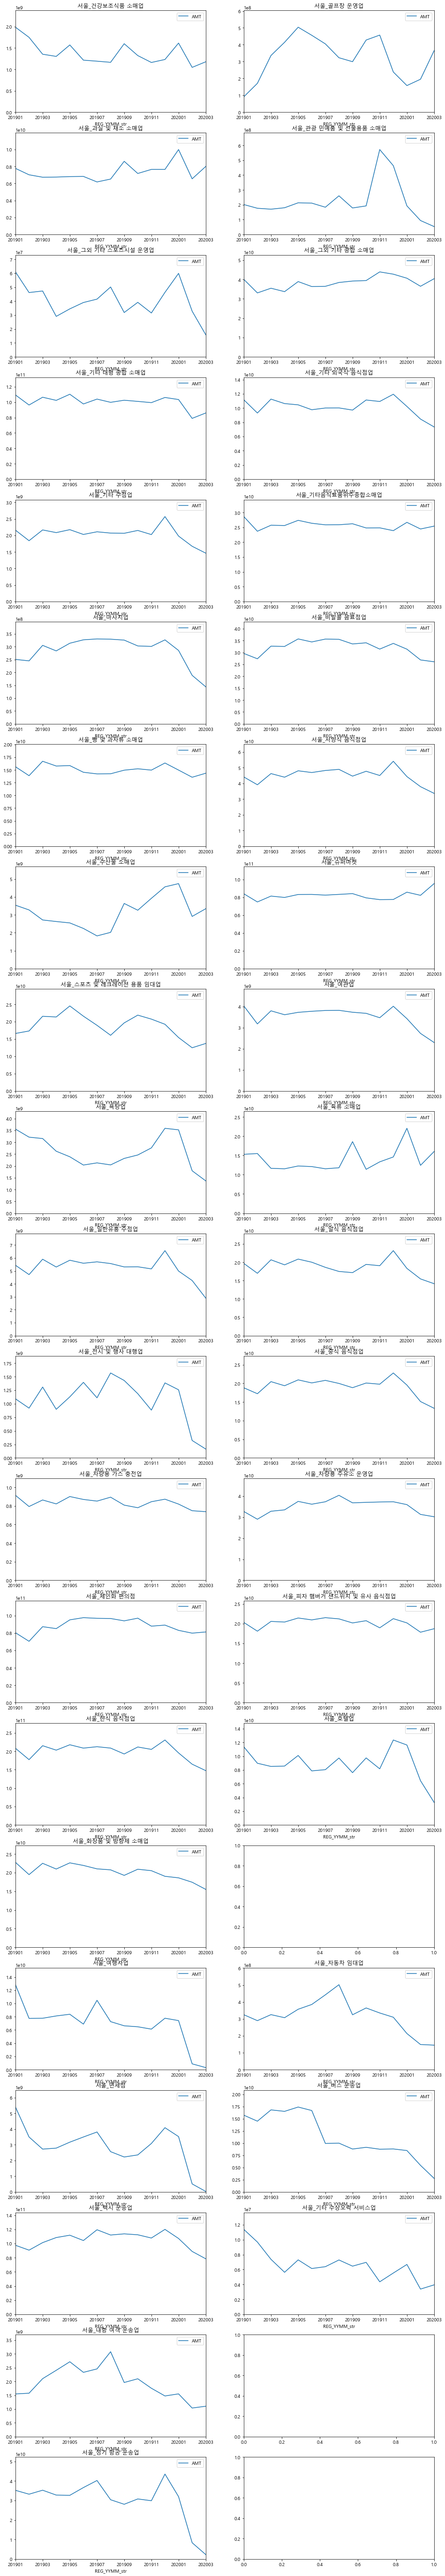

In [5]:
graph_sido_amt('서울')

In [76]:
df[df['AMT']==df['AMT'].min()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
13120505,201908,서울,중구,슈퍼마켓,경기,성남시 분당구,30s,2,2,4,20,5


In [8]:
df.groupby('CARD_SIDO_NM')['STD_CLSS_NM'].unique()

CARD_SIDO_NM
강원    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경기    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경북    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
광주    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
대구    [건강보조식품 소매업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그...
대전    [건강보조식품 소매업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그...
부산    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 그외 기타 스포츠시설...
서울    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
세종    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
울산    [건강보조식품 소매업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그...
인천    [건강보조식품 소매업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그...
전남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 그외 기타 종합 소매...
전북    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 그외 기타 종합 소매...
제주    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
충남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
충북    [건강보조식품 소매업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그...
Name: STD_CLSS_NM, dtype: object

In [9]:
df['CARD_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

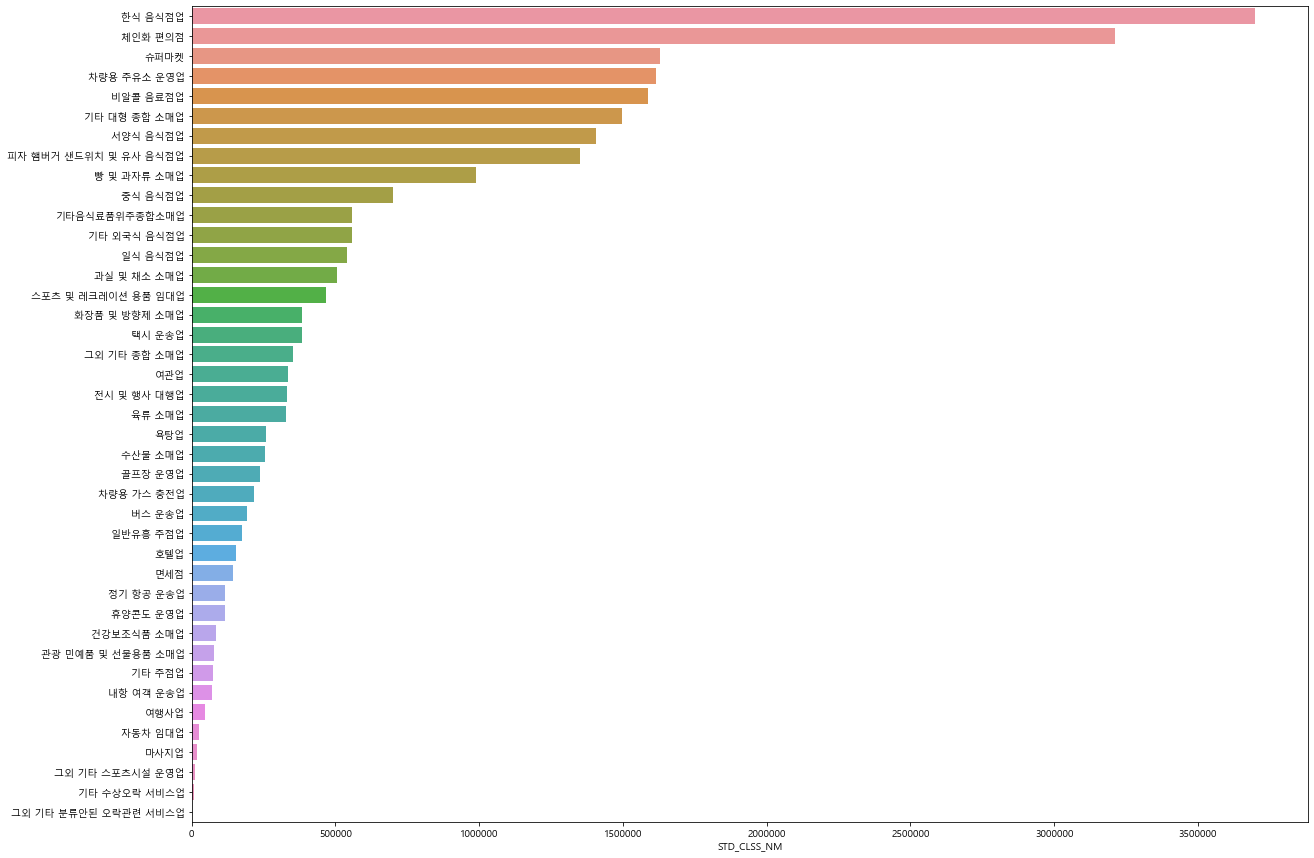

In [19]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y=df['STD_CLSS_NM'].value_counts().index,x=df['STD_CLSS_NM'].value_counts())

In [12]:
city_count= df.groupby(['CARD_SIDO_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()

,CARD_SIDO_NM,STD_CLSS_NM,count
0,강원,한식 음식점업,203495
1,강원,체인화 편의점,193370
2,강원,슈퍼마켓,109987
3,강원,차량용 주유소 운영업,95691
4,강원,비알콜 음료점업,62887


In [13]:
city_sum = city_count.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,건강보조식품 소매업,1480
1,강원,골프장 운영업,32089
2,강원,과실 및 채소 소매업,27154
3,강원,관광 민예품 및 선물용품 소매업,4428
4,강원,그외 기타 분류안된 오락관련 서비스업,2


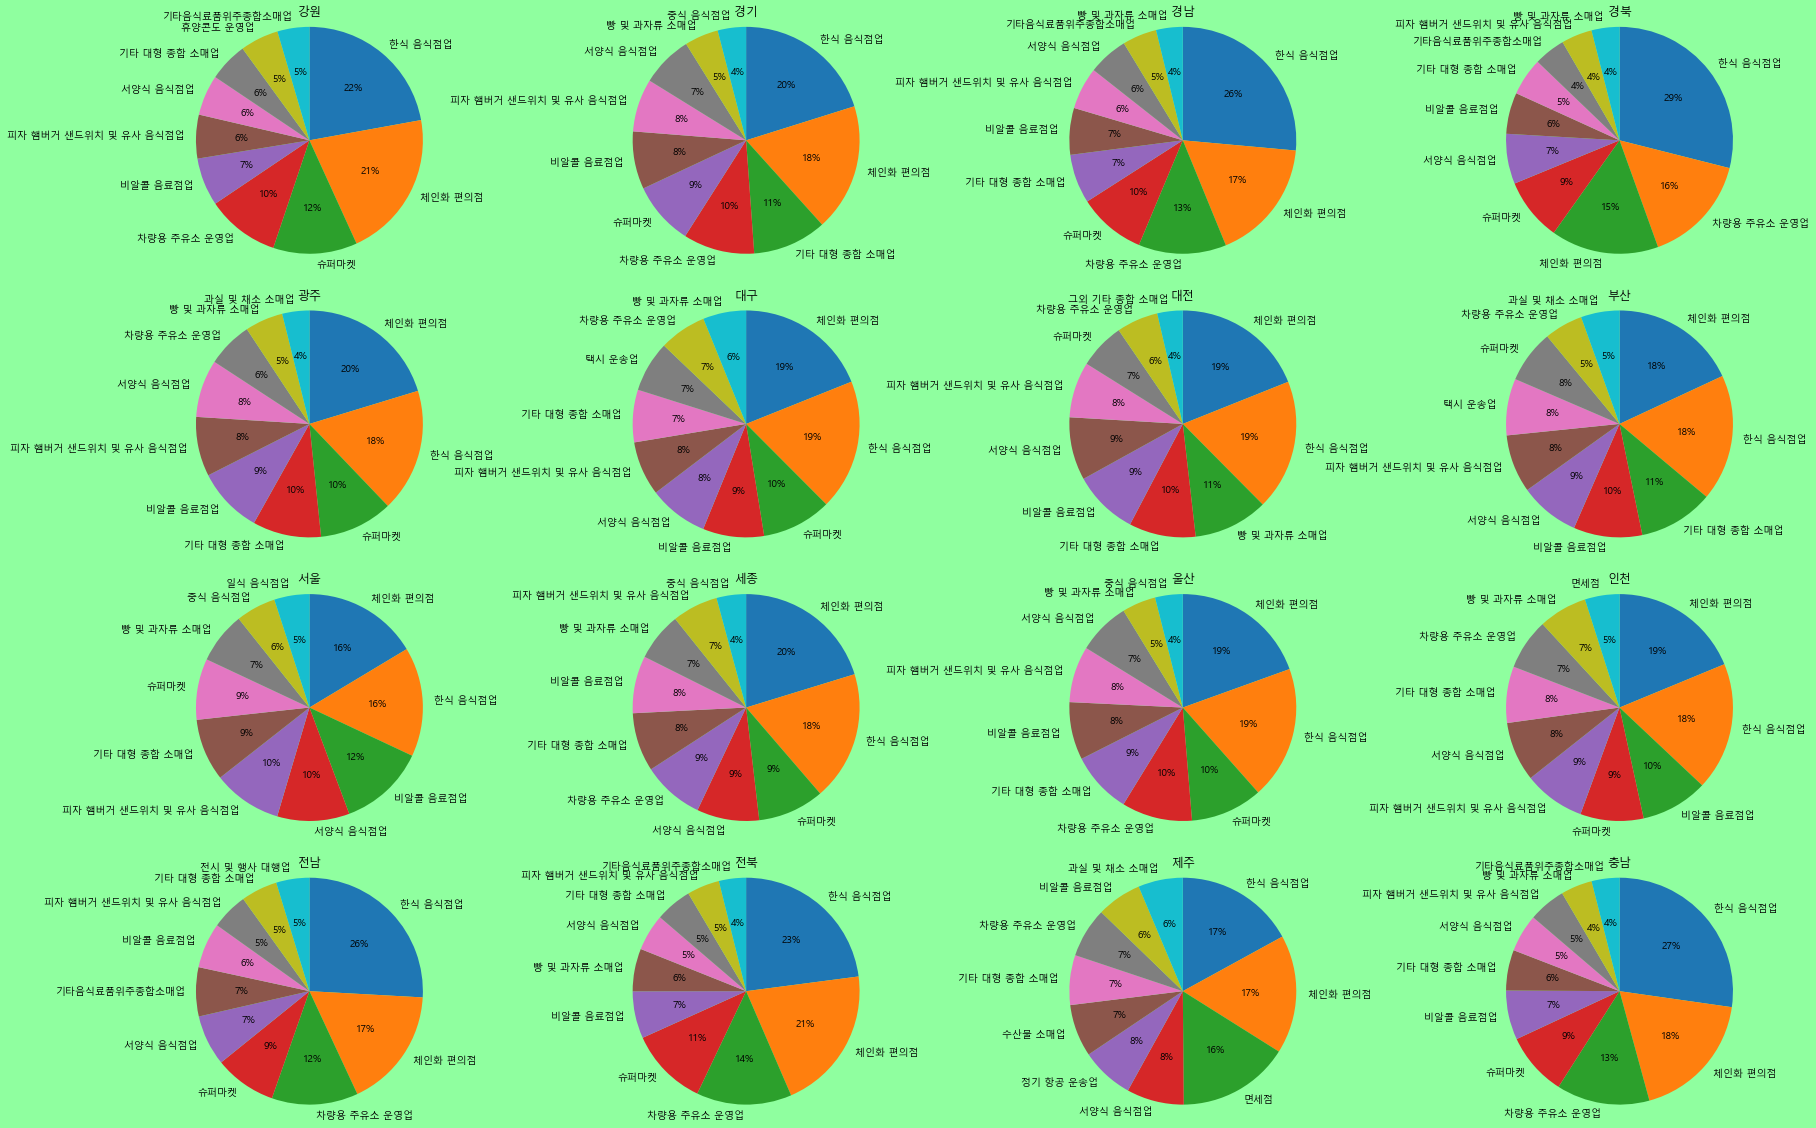

In [20]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

#plt.tight_layout()
plt.show()


In [16]:
stuff = df.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff.head()

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,1097627,921682
1,골프장 운영업,4951383,3649887
2,과실 및 채소 소매업,24497628,15953201
3,관광 민예품 및 선물용품 소매업,593750,482667
4,그외 기타 분류안된 오락관련 서비스업,1410,1258


In [ ]:
#이용고객수에 비해 이용건수의 크기가 작은 경우 -> 카드 취소가 많은 업종
#이용고객수에 비해 이용건수가 큰 경우 -> 같은 고객이 많이 오는 업종

In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [41]:
data.shape

(24697792, 13)

In [11]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [12]:
# 날짜 처리
data = pd.read_csv('data/jeju_data_ver1/201901-202003.csv')
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [13]:
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)
df.head()

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3


In [74]:
df.iloc[df['AMT'].idxmin(),:]

REG_YYMM         201908
CARD_SIDO_NM         서울
CARD_CCG_NM          중구
STD_CLSS_NM        슈퍼마켓
HOM_SIDO_NM          경기
HOM_CCG_NM      성남시 분당구
AGE                 30s
SEX_CTGO_CD           2
FLC                   2
CSTMR_CNT             4
AMT                  20
CNT                   5
Name: 13120505, dtype: object

In [14]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [23]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
train_features = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [38]:
df.loc[(df['year']==2019)|((df['year']==2020)&(df['month']<3)),:]

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,3,148000,4
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,5,329800,7
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,7,557800,7
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,3,247800,3


In [24]:
# 훈련
model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
model2=LinearRegression()
model2.fit(train_features,train_target)

In [ ]:
model3=
model3.fit(train_features,train_target)

In [25]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4,7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [26]:
temp

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,0,0,0,1,1,1,2020,4
1,0,0,0,1,1,1,2020,7
2,0,0,0,1,1,2,2020,4
3,0,0,0,1,1,2,2020,7
4,0,0,0,1,1,3,2020,4
...,...,...,...,...,...,...,...,...
1658855,16,30,14,0,2,3,2020,7
1658856,16,30,14,0,2,4,2020,4
1658857,16,30,14,0,2,4,2020,7
1658858,16,30,14,0,2,5,2020,4


In [27]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [87]:
temp.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004,강원,건강보조식품 소매업,5.049486e+08
1,202004,강원,골프장 운영업,6.959584e+09
2,202004,강원,과실 및 채소 소매업,1.815465e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,9.745725e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,9.385428e+07


In [29]:
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [84]:
submission = pd.read_csv('data/jeju_data_ver1/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission.head()
submission['AMT']

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM
id,,,
0,202004,강원,건강보조식품 소매업
1,202004,강원,골프장 운영업
2,202004,강원,과실 및 채소 소매업
3,202004,강원,관광 민예품 및 선물용품 소매업
4,202004,강원,그외 기타 분류안된 오락관련 서비스업


In [50]:
submission = pd.read_csv('data/jeju_data_ver1/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,5.049486e+08
1,202004,강원,골프장 운영업,6.959584e+09
2,202004,강원,과실 및 채소 소매업,1.815465e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,9.745725e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,9.385428e+07


In [ ]:
from statsmodels.tsa.stattools import adfuller
df['z_data'] = (df['data'] - df.data.rolling(window=12).mean()) / df.data.rolling(window=12).std()
df['zp_data'] = df['z_data'] - df['z_data'].shift(12)


print(" > Is the data stationary ?")
dftest = adfuller(df.data, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(df.z_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(df.zp_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
